In [84]:
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

palette = sns.color_palette()

In [2]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


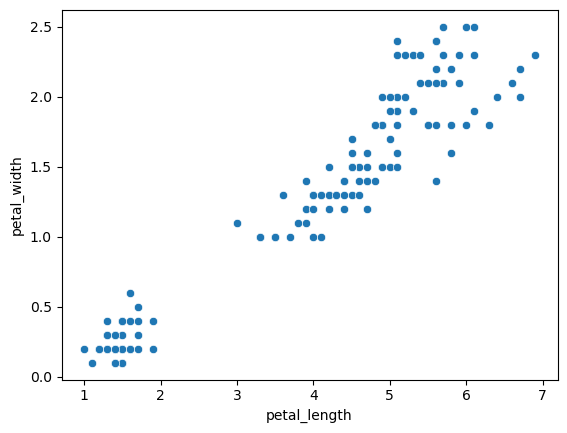

In [4]:
petal_length = iris['petal_length']
petal_width = iris['petal_width']
sns.scatterplot(x=petal_length,y=petal_width);

In [85]:
X = sm.add_constant(petal_length)
y = petal_width

# Fit the model
model = sm.OLS(y, X).fit()

# Get a summary of the model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           4.68e-86
Time:                        08:21:11   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

In [89]:
model.params

const          -0.363076
petal_length    0.415755
dtype: float64

In [91]:
lr = LinearRegression()
# Train the model
lr.fit(np.array(petal_length).reshape(-1, 1), np.array(petal_width).reshape(-1, 1))
lr.coef_, lr.intercept_

(array([[0.41575542]]), array([-0.36307552]))

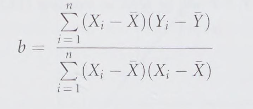

In [38]:
def calc_slope(x,y):
    numerator = (x - x.mean()) * (y - y.mean())
    denominator = (x - x.mean()) ** 2
    return np.sum(numerator) / np.sum(denominator)

def calc_intercept(x,y):
    slope = calc_slope(x,y)
    return y.mean() - slope * x.mean()

In [40]:
slope = calc_slope(petal_length,petal_width)
intercept = calc_intercept(petal_length,petal_width)
slope, intercept

(0.4157554163524115, -0.36307552131902887)

In [37]:
np.isclose(slope, model.coef_[0,0]), np.isclose(intercept, model.intercept_[0])

(True, True)

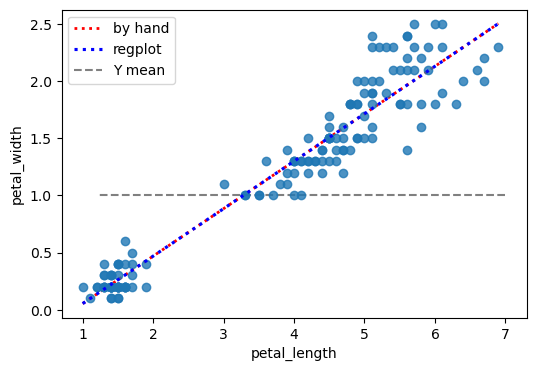

In [83]:

petal_length = iris['petal_length']
petal_width = iris['petal_width']

x_vals = np.array([np.min(petal_length),
                   np.max(petal_length)])
y_vals = intercept + slope * x_vals

plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, color='red', ls='dotted', linewidth=2,zorder=-1,label='by hand')

sns.regplot(x=petal_length,y=petal_width,ci=None,line_kws={'ls':'dotted','color':'blue','label':'regplot'},);

plt.hlines(1,7, petal_width.mean(),color='gray',zorder=-1,ls='--',label='Y mean')
plt.legend()

plt.show()

### Significance

In [92]:
X = sm.add_constant(petal_length)
y = petal_width

# Fit the model
model = sm.OLS(y, X).fit()

# Get a summary of the model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           4.68e-86
Time:                        08:23:49   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

In [94]:
petal_width_reg = intercept + slope * petal_length

In [118]:
model.df_model, model.df_resid

(1.0, 148.0)

In [116]:
regression_sum_of_squares = np.sum((petal_width_reg - petal_width_reg.mean()) ** 2)
np.isclose(model.ess,  regression_sum_of_squares), regression_sum_of_squares

(True, 80.25983695408436)

In [121]:
MSE_regression = regression_sum_of_squares / 1
MSE_regression

80.25983695408436

148.0

In [122]:
residual_sum_of_squares = np.sum((petal_width - petal_width_reg) ** 2)
np.isclose(model.ssr,  residual_sum_of_squares), residual_sum_of_squares

(True, 6.310096379248979)

In [128]:
MSE_residual = residual_sum_of_squares / (len(petal_width) - 2)
MSE_residual

0.042635786346276884

In [130]:
Fratio = MSE_regression/MSE_residual
Fratio

1882.4523676480276

In [132]:
alpha = 0.05
critical_F_ratio = stats.f.ppf(1 - alpha, 1, df_residual)
critical_F_ratio

3.905060109766206

In [144]:
stats.f.sf(Fratio, 1, df_residual)

4.675003907327411e-86

In [136]:
model.f_pvalue

4.675003907327543e-86

#### Coefficient of determination ${r^2}$

In [167]:
coef_determination = regression_sum_of_squares / (residual_sum_of_squares + regression_sum_of_squares)
coef_determination

0.9271098389904927

In [168]:
model.rsquared == coef_determination

True

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           4.68e-86
Time:                        15:47:59   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""